In [2]:
import pandas as pd
import numpy as np
from Datapreprocessing import DataProcessor, ExploratoryDataAnalysis
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

## Read in and preprocess the data

In [3]:
train_folder = 'train_tsv1'
test_folder = 'test_tsv1'
train_metadata_path = 'metadata/training_metadata.csv'
test_metadata_path = 'metadata/test_metadata.csv'

In [4]:
processor = DataProcessor(train_folder, test_folder, train_metadata_path, test_metadata_path)
train_data, test_data = processor.prepare_datasets()

In [5]:
train_data.head()

,participant_id,correlation_id,correlation_value,age,sex,study_site,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,NDAREE015WGU,corr_1,0.074628,13.35,Female,HBNsiteCBIC,19.1,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.6
1,NDAREE015WGU,corr_2,0.673757,13.35,Female,HBNsiteCBIC,19.1,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.6
2,NDAREE015WGU,corr_3,0.813541,13.35,Female,HBNsiteCBIC,19.1,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.6
3,NDAREE015WGU,corr_4,0.725489,13.35,Female,HBNsiteCBIC,19.1,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.6
4,NDAREE015WGU,corr_5,0.823861,13.35,Female,HBNsiteCBIC,19.1,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.6


In [6]:
train_data.shape

(21969600, 16)

In [7]:
test_data.shape

(9432600, 15)

In [8]:
# train_data.to_csv('train_data.csv', index=False)
# test_data.to_csv('test_data.csv', index=False)

## EDA and Missing Values for Long Format Data

In [9]:
na_counts = processor.train_data.isna().sum()
columns_with_na = na_counts[na_counts > 0]
print(columns_with_na)

bmi                    358200
ethnicity             2169100
race                  3343200
parent_1_education    3641700
parent_2_education     437800
dtype: int64


In [10]:
processor.train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21969600 entries, 0 to 21969599
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   participant_id      object 
 1   correlation_id      object 
 2   correlation_value   float64
 3   age                 float64
 4   sex                 object 
 5   study_site          object 
 6   bmi                 float64
 7   ethnicity           object 
 8   race                object 
 9   handedness          object 
 10  parent_1_education  object 
 11  parent_2_education  object 
 12  p_factor_fs         float64
 13  internalizing_fs    float64
 14  externalizing_fs    float64
 15  attention_fs        float64
dtypes: float64(7), object(9)
memory usage: 2.6+ GB


In [11]:
# Check for the 8 object columns
object_columns = processor.train_data.select_dtypes(include=['object']).columns
print("Object columns in the training data:")
for col in object_columns:
    print(f" - {col}")

Object columns in the training data:
 - participant_id
 - correlation_id
 - sex
 - study_site
 - ethnicity
 - race
 - handedness
 - parent_1_education
 - parent_2_education


In [12]:
eda = ExploratoryDataAnalysis(dataframe=processor.train_data)
eda.basic_stats()

Dataset contains 1104 unique participants with 21969600 total observations
Basic Statistics:

Correlation Values Statistics:
count    2.196960e+07
mean     2.232739e-02
std      2.501904e-01
min     -8.720615e-01
25%     -1.545522e-01
50%      2.323657e-03
75%      1.792724e-01
max      9.620405e-01
Name: correlation_value, dtype: float64

Demographic Variables Statistics (Participant Level):
                   count       mean       std    min      25%     50%  \
age               1104.0  11.190634  3.234936   5.05   8.6550  10.585   
bmi               1086.0  19.835580  4.956126  12.60  16.2700  18.565   
p_factor_fs       1104.0   0.218623  1.002518  -1.61  -0.5400   0.215   
internalizing_fs  1104.0   0.103197  1.016288  -2.26  -0.7400   0.070   
externalizing_fs  1104.0   0.094810  1.070137  -2.15  -0.6300  -0.240   
attention_fs      1104.0   0.079158  0.994986  -3.18  -0.6025   0.090   

                      75%    max  
age               13.5125  21.90  
bmi               22.1

Missing Values Analysis:
Missing correlation values: 0 (0.00%)

Missing Values in Demographic Data (Participant Level):
                    Missing Values  Percentage (%)
bmi                             18        1.630435
ethnicity                      109        9.873188
race                           168       15.217391
parent_1_education             183       16.576087
parent_2_education              22        1.992754


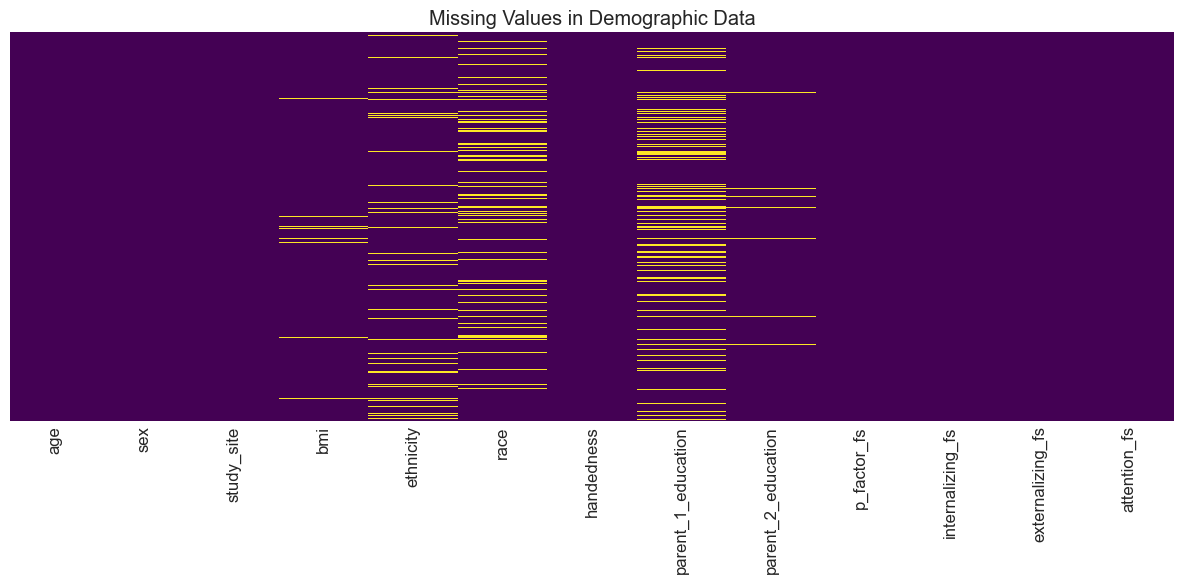

In [14]:
eda.missing_values_analysis()

Correlation Values Distribution:


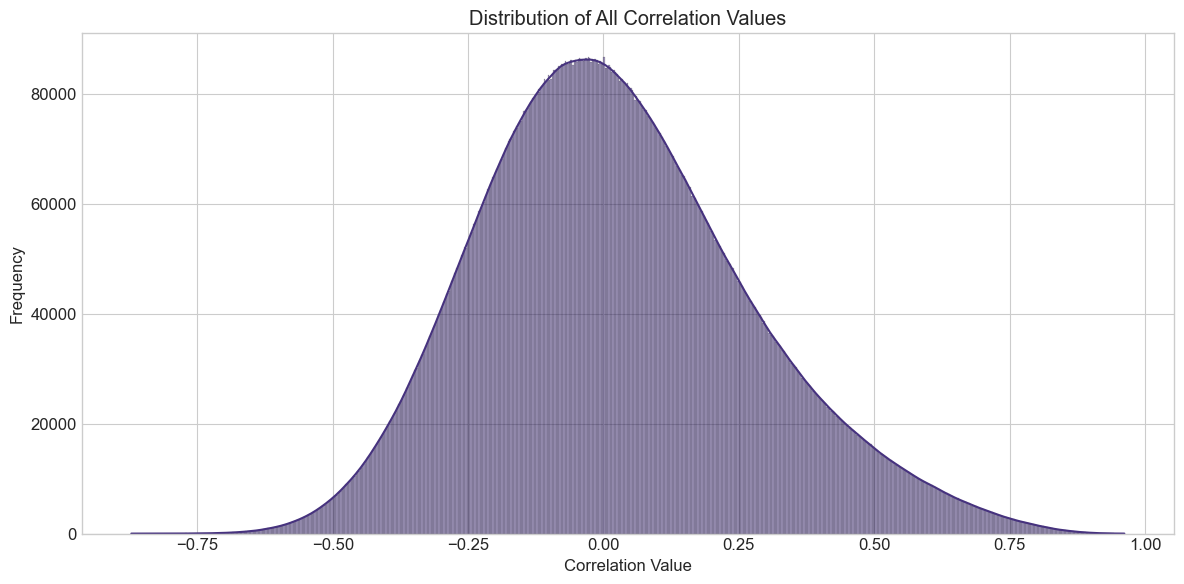


Distribution Statistics for Correlation Values:
count    2.196960e+07
mean     2.232739e-02
std      2.501904e-01
min     -8.720615e-01
25%     -1.545522e-01
50%      2.323657e-03
75%      1.792724e-01
max      9.620405e-01
Name: correlation_value, dtype: float64

Potential outliers: 195504 values outside of range [-0.655, 0.680]


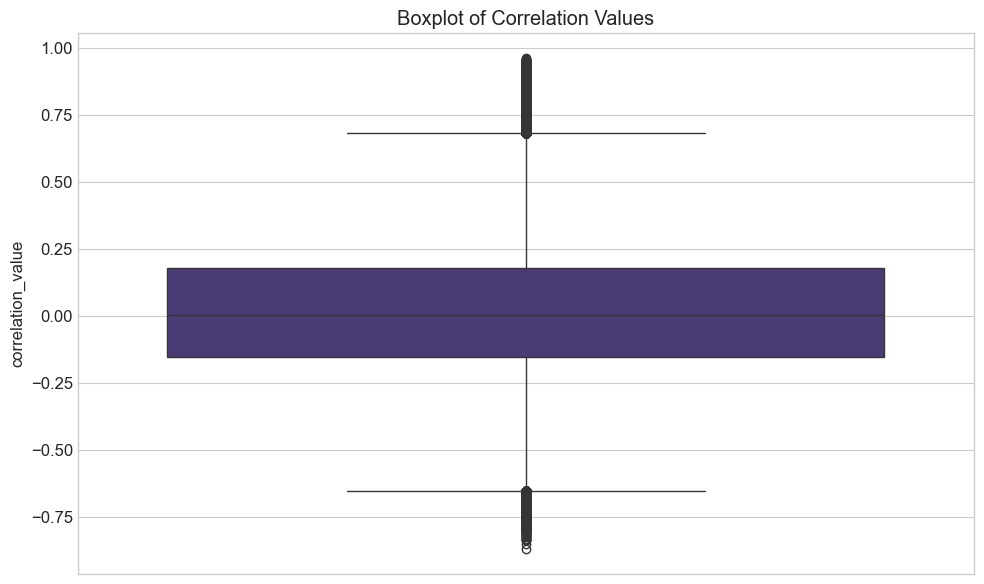

In [15]:
eda.correlation_distribution()

Participant-Level Analysis:


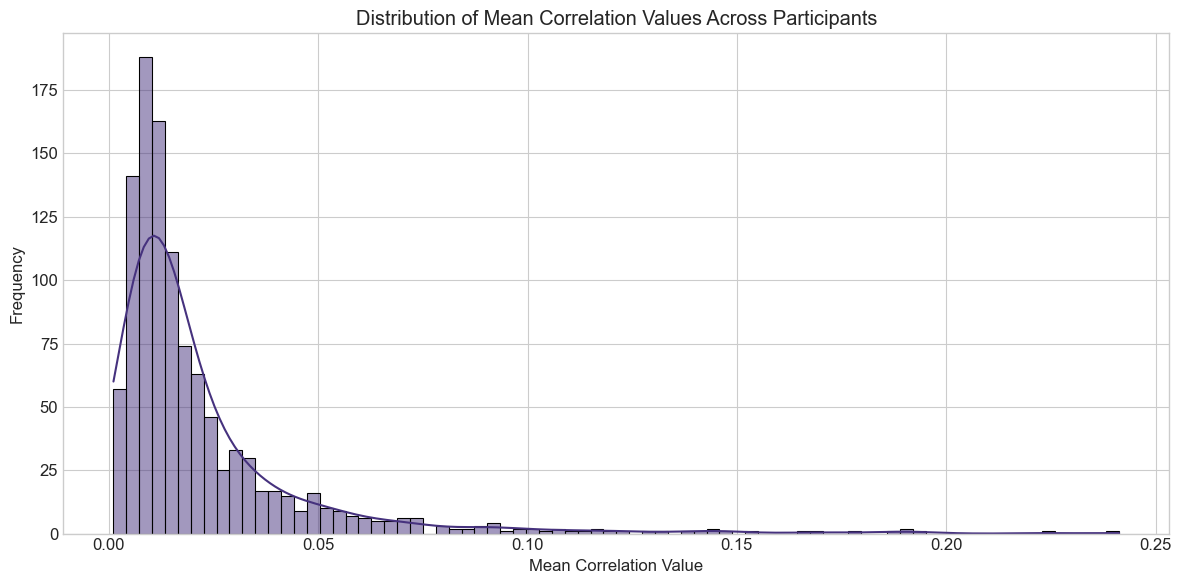

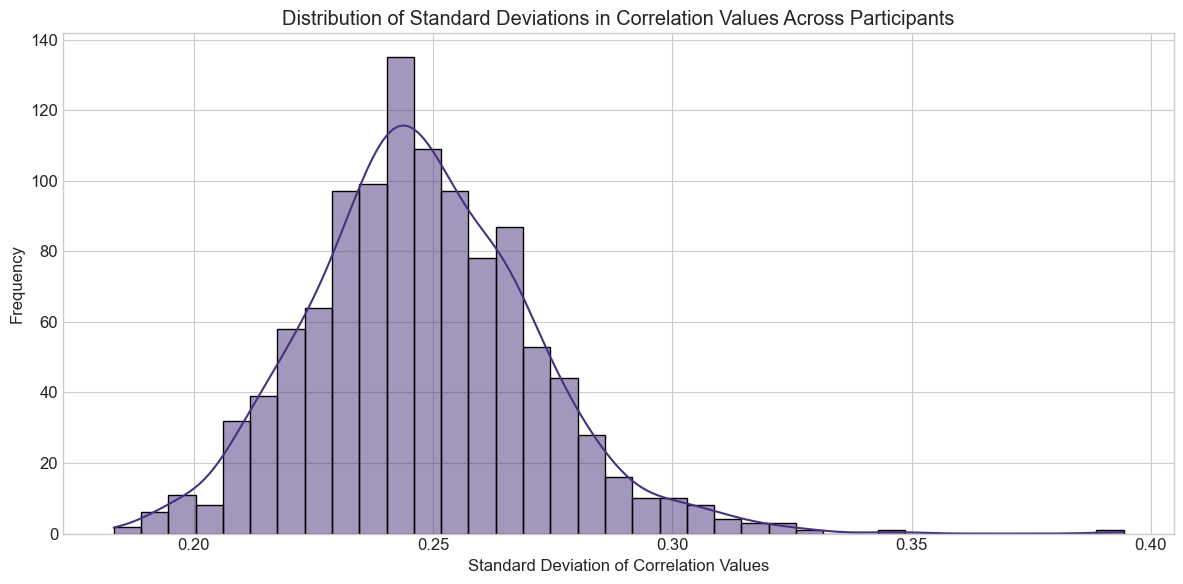

In [18]:
eda.participant_level_analysis()

Demographic Variables Correlation Heatmap:


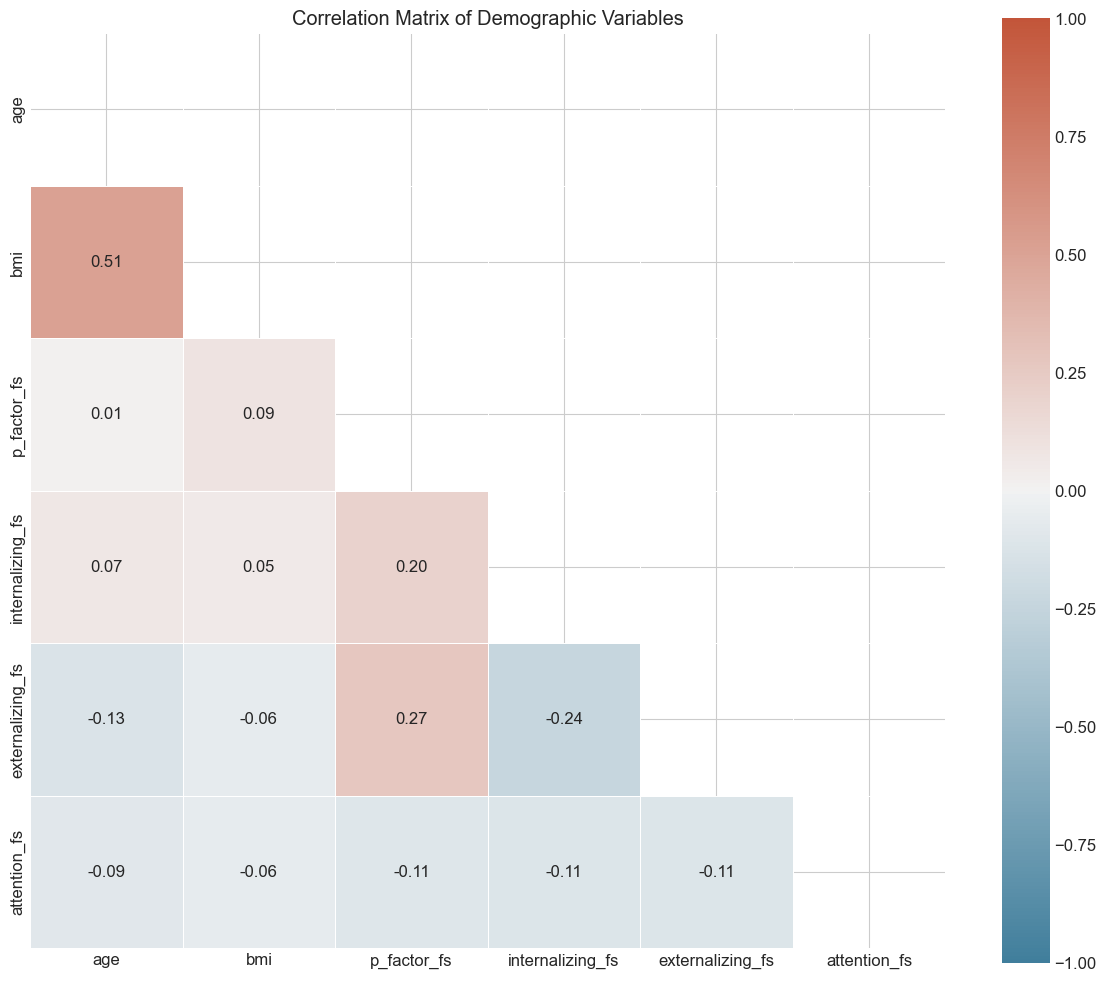

In [20]:
eda.demographic_correlation_heatmap()

## Explore Correlation Matrix Difference Between Sex

In [4]:
df = pd.read_csv('train_data_wide.csv')
df.head()

,participant_id,corr_1,corr_2,corr_3,corr_4,corr_5,corr_6,corr_7,corr_8,corr_9,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,NDAREE015WGU,0.074628,0.673757,0.813541,0.725489,0.823861,0.801859,0.690204,0.450536,0.602295,...,19.10,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.60
1,NDARNV694EMG,0.167241,0.549381,0.453434,0.132590,0.496156,0.337475,0.506641,0.215110,0.564849,...,32.46,Not_Hispanic_or_Latino,White,Right,Complete_primary,Complete_tertiary,-0.17,0.54,-1.00,-0.87
2,NDARFR108JNB,0.197198,0.337779,0.018934,0.580793,0.728406,0.507803,0.470236,0.401553,0.547191,...,15.98,Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,-0.43,-0.25,0.18,0.39
3,NDARZF170TZ0,0.370992,0.546226,0.659874,0.212565,0.429793,0.352411,0.047157,0.112740,0.012267,...,14.92,Not_Hispanic_or_Latino,Other,Right,Complete_primary,Complete_tertiary,-0.33,0.25,-0.31,1.10
4,NDARYJ334EHH,0.127956,0.415074,0.219740,0.311787,0.650690,0.615524,0.597610,0.334451,0.327396,...,18.85,Hispanic_or_Latino,NaN,Right,NaN,No_incomplete primary,-1.04,-0.40,-0.53,0.71


/opt/anaconda3/envs/wids/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Subjects: 100%|██████████| 1104/1104 [18:23<00:00,  1.00subj/s]
/opt/anaconda3/envs/wids/lib/python3.12/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


gender
Male      688
Female    416
Name: count, dtype: int64

CLUSTERING:
Male: nan ± nan
Female: nan ± nan
p-value: nan

EFFICIENCY:
Male: nan ± nan
Female: nan ± nan
p-value: nan

MODULARITY:
Male: nan ± nan
Female: nan ± nan
p-value: nan


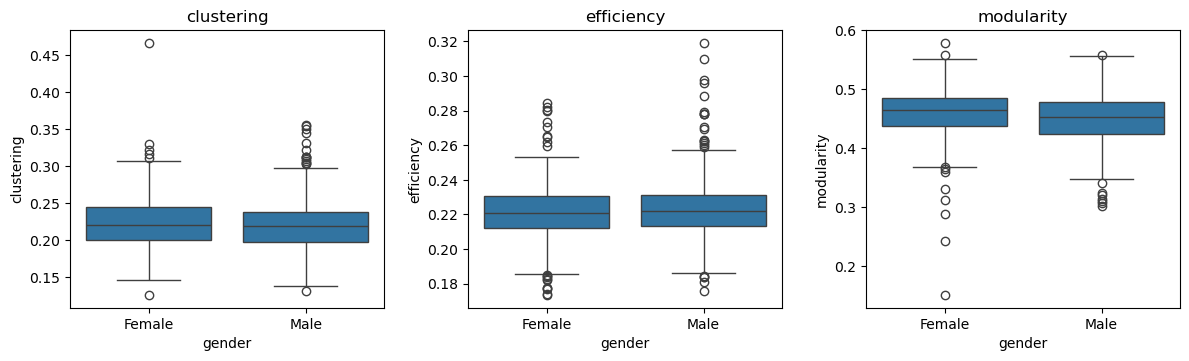

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from bct import (threshold_proportional, clustering_coef_wu, 
                 efficiency_wei, community_louvain)
from tqdm.auto import tqdm

def create_adjacency_matrix(subject_data, correlation_cols, num_regions):
    """Convert correlation columns to a square adjacency matrix"""
    adj_matrix = np.zeros((num_regions, num_regions))
    index = 0
    for i in range(num_regions):
        for j in range(i+1, num_regions):
            adj_matrix[i, j] = subject_data[correlation_cols[index]]
            adj_matrix[j, i] = subject_data[correlation_cols[index]]  # Symmetric
            index += 1
    return adj_matrix

# Get number of brain regions (based on correlation columns)
# For n regions, you should have n*(n-1)/2 correlations
correlation_cols = [c for c in df.columns if c.startswith('corr_')]
num_regions = int((1 + np.sqrt(1 + 8 * len(correlation_cols))) / 2)

# Create connectome for each subject
subject_ids = df['participant_id'].unique()
connectomes = {}
for subject in subject_ids:
    subject_data = df[df['participant_id'] == subject].iloc[0]  # Get subject data
    connectomes[subject] = create_adjacency_matrix(subject_data, correlation_cols, num_regions)

# Group by gender
male_subjects = df[df['sex'] == 'male']['participant_id'].values
female_subjects = df[df['sex'] == 'female']['participant_id'].values

# Calculate network metrics for each subject
metrics = {'subject_id': [], 'gender': [], 'clustering': [], 'efficiency': [], 'modularity': []}

for subject in tqdm(subject_ids, desc="Subjects", unit="subj"):
    # Get subject gender
    gender = df[df['participant_id'] == subject]['sex'].values[0]
    
    # Get connectome and threshold it (keep top 20% of connections)
    connectome = connectomes[subject]
    thresholded = threshold_proportional(connectome, 0.2)
    # clust = clustering_coef_wu(thresholded)
    # eff   = efficiency_wei(thresholded)
    # ci, Q = community_louvain(thresholded)
    # print(subject,
    #       "clust[0:5]=", clust[:5],
    #       "  nanmean(clust)=", np.nanmean(clust),
    #       "  eff=", eff,
    #       "  Q=", Q)
    
    # Create NetworkX graph for some calculations
    G = nx.from_numpy_array(thresholded)
    
    # Calculate metrics
    metrics['subject_id'].append(subject)
    metrics['gender'].append(gender)
    
    # 1) Local clustering (average)
    metrics['clustering'].append(np.nanmean(clustering_coef_wu(thresholded)))
    
    # 2) Global efficiency
    e = efficiency_wei(thresholded)
    metrics['efficiency'].append(0.0 if np.isnan(e) else e)
    
    # 3) Louvain modularity
    _, Q = community_louvain(thresholded)
    metrics['modularity'].append(0.0 if np.isnan(Q) else Q)

# Create DataFrame of metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df['gender'].value_counts())

# Compare metrics between genders
for metric in metrics_df.columns[2:]:  # Skip subject_id and gender
    male_values = metrics_df[metrics_df['gender'] == 'male'][metric]
    female_values = metrics_df[metrics_df['gender'] == 'female'][metric]
    
    # T-test
    t_stat, p_val = stats.ttest_ind(male_values, female_values, equal_var=False)
    
    print(f"\n{metric.upper()}:")
    print(f"Male: {male_values.mean():.4f} ± {male_values.std():.4f}")
    print(f"Female: {female_values.mean():.4f} ± {female_values.std():.4f}")
    print(f"p-value: {p_val:.4f}" + (" *" if p_val < 0.05 else ""))

# Visualize differences
plt.figure(figsize=(12, 10))
metrics_to_plot = [col for col in metrics_df.columns if col not in ['subject_id', 'gender']]
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='gender', y=metric, data=metrics_df)
    plt.title(metric)
plt.tight_layout()
plt.show()



In [ ]:
# Network-Based Statistics (NBS)
# Compare edge-wise differences between groups with multiple comparison correction
from netneurotools import stats as nnstats

# Stack connectomes into arrays by gender
male_connectomes = np.stack([connectomes[subj] for subj in male_subjects])
female_connectomes = np.stack([connectomes[subj] for subj in female_subjects])

# Perform NBS
t_mat, p_mat = nnstats.gen_net_ttest(male_connectomes, female_connectomes, 
                                     paired=False, tails='both')
sig_network = nnstats.nbs(t_mat, p_mat, thresh=3.0, k=100)

# Visualize significant subnetworks
plt.figure(figsize=(8, 8))
plt.imshow(sig_network, cmap='hot', interpolation='none')
plt.colorbar(label='Significant gender difference')
plt.title('Subnetworks showing significant gender differences')
plt.show()

# Hub analysis - identify gender differences in hub organization
def identify_hubs(connectomes, subject_ids, percentile=80):
    # Calculate degree centrality for each node for each subject
    all_degrees = []
    for subject in subject_ids:
        G = nx.from_numpy_array(connectomes[subject])
        degrees = dict(nx.degree_centrality(G))
        all_degrees.append(list(degrees.values()))
    
    # Convert to array and identify hub regions (top percentile)
    all_degrees = np.array(all_degrees)
    avg_degrees = all_degrees.mean(axis=0)
    hub_threshold = np.percentile(avg_degrees, percentile)
    hub_regions = np.where(avg_degrees >= hub_threshold)[0]
    
    return hub_regions, avg_degrees

# Identify hubs for each gender
male_hubs, male_degrees = identify_hubs(connectomes, male_subjects)
female_hubs, female_degrees = identify_hubs(connectomes, female_subjects)

# Plot hub distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(male_degrees)), male_degrees, alpha=0.7)
plt.axhline(y=np.percentile(male_degrees, 80), color='r', linestyle='--')
plt.title('Male Hub Distribution')
plt.xlabel('Brain Region')
plt.ylabel('Centrality')

plt.subplot(1, 2, 2)
plt.bar(range(len(female_degrees)), female_degrees, alpha=0.7)
plt.axhline(y=np.percentile(female_degrees, 80), color='r', linestyle='--')
plt.title('Female Hub Distribution')
plt.xlabel('Brain Region')
plt.ylabel('Centrality')
plt.tight_layout()
plt.show()

# Compare hub overlap between genders
common_hubs = set(male_hubs).intersection(set(female_hubs))
male_specific = set(male_hubs) - common_hubs
female_specific = set(female_hubs) - common_hubs

print(f"Number of common hubs: {len(common_hubs)}")
print(f"Male-specific hubs: {len(male_specific)}, regions: {male_specific}")
print(f"Female-specific hubs: {len(female_specific)}, regions: {female_specific}")